In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.analysis import *
from src.data import FTRC_Data

import json
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import battery failure data bank
data = FTRC_Data()

# Remove non-commercial cells, 'test' cells, and cells with less than 10 measurements from the data set
cells_to_remove = [
    'Soteria 18650 (AL)',
    'Soteria 18650 (ALCU)',
    'Soteria 18650 (CU)',
    'Soteria 18650 (DW)',
    'Soteria 18650 (ALDW)',
    'Soteria 18650 (ALCUDW)',
    'Soteria 18650 (Control)',
    'Saft D-Cell-VES16',
    'MOLiCEL 18650-J',
    'MOLiCEL 18650-M35A',
#     'MOLiCEL 18650-P28A',
    'MOLiCEL 18650-Test Cell',
    'MOLiCEL 18650-Test Cell (DW-Gold)',
    'MOLiCEL 18650-Test Cell (DW-Silver)',
    'LG 18650-HG2',
#     'LG 18650-M36',
    'LG 18650-Test Cell (NBV-220)',
    'LG 18650-Test Cell (NBV-250)',
    'Panasonic 18650-BE',
    'Samsung 18650-26J',
    'Samsung 18650-30Q',
    'Sony 18650-VTC6',
    ]
for cell in cells_to_remove:
    data.remove(cell)

df = data.df

# cell_descriptions_plot_labels = {
#     "KULR 21700-K500": "KULR\n21700-K500",
#     "KULR 18650-K330": "KULR\n18650-K330",
#     "LG 21700-M50 (BV)": "LG\n21700-M50",
#     "LG 18650-Test Cell (BV-220)": "LG 18650\n(BV-220)",
#     "LG 18650-MJ1 (Korean)": "LG\n18650-MJ1",
#     "LG 18650-Test Cell (BV-250)": "LG 18650\n(BV-250)",
#     "Sanyo 18650-A": "Sanyo\n18650-A",
#     "Sony 18650-VC7": "Sony\n18650-VC7",
# }
# df.loc[:, "Cell-Description (NEW)"] = df["Cell-Description"].apply(lambda x: cell_descriptions_plot_labels[x])

# cell_descriptions_clean = {
#     "KULR 21700-K500": "KULR 21700-K500",
#     "KULR 18650-K330": "KULR 18650-K330",
#     "LG 21700-M50 (BV)": "LG 21700-M50",
#     "LG 18650-Test Cell (BV-220)": "LG 18650 (BV-220)",
#     "LG 18650-MJ1 (Korean)": "LG 18650-MJ1",
#     "LG 18650-Test Cell (BV-250)": "LG 18650 (BV-250)",
#     "Sanyo 18650-A": "Sanyo 18650-A",
#     "Sony 18650-VC7": "Sony 18650-VC7",
# }
# df.loc[:, "Cell-Description"] = df["Cell-Description"].apply(lambda x: cell_descriptions_clean[x])

df.loc[:, "Distribution"] = "Actual"

In [4]:
data.df[data.df['Pre-Test-State-of-Charge-%']!=100]['Cell-Description'].value_counts()

data.df['Cell-Description'].value_counts()

LG 18650-MJ1 (Korean)          35
KULR 21700-K500                30
LG 21700-M50 (BV)              25
MOLiCEL 18650-P28A             24
KULR 18650-K330                22
LG 18650-M36                   19
LG 18650-Test Cell (BV-220)    16
LG 18650-Test Cell (BV-250)    14
Sanyo 18650-A                  12
Sony 18650-VC7                 12
Name: Cell-Description, dtype: int64

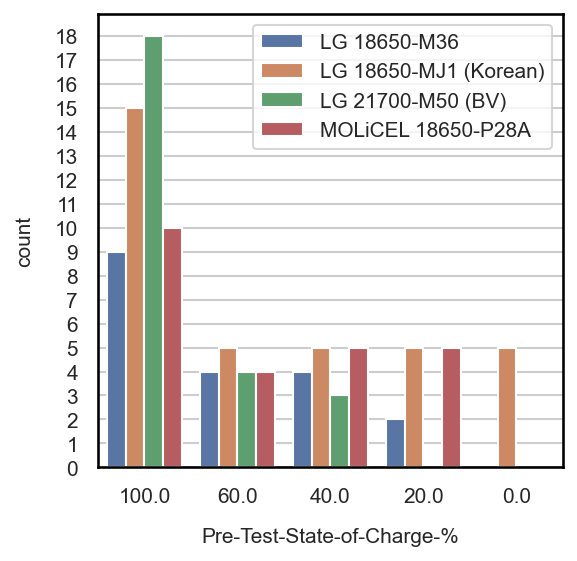

In [35]:
sns.set(rc={'figure.figsize': (4,4),'axes.labelsize': 10, 'ytick.labelsize': 10, 'axes.labelpad': 10,
            'legend.fontsize':10, 'xtick.labelsize': 10, "figure.dpi":150, 'legend.title_fontsize':5})
sns.set_style("whitegrid", {'axes.edgecolor':"black"})

SOC = data.df.copy()

cells = list(SOC[SOC['Pre-Test-State-of-Charge-%']!=100]['Cell-Description'].value_counts().index)
SOC = SOC[SOC['Cell-Description'].isin(cells)]

sns.countplot(data=SOC, x='Pre-Test-State-of-Charge-%', order=df['Pre-Test-State-of-Charge-%'].value_counts().index, hue='Cell-Description')
plt.legend(loc='upper right')
plt.yticks(range(19));

# plt.savefig('num_cells.png',bbox_inches="tight")

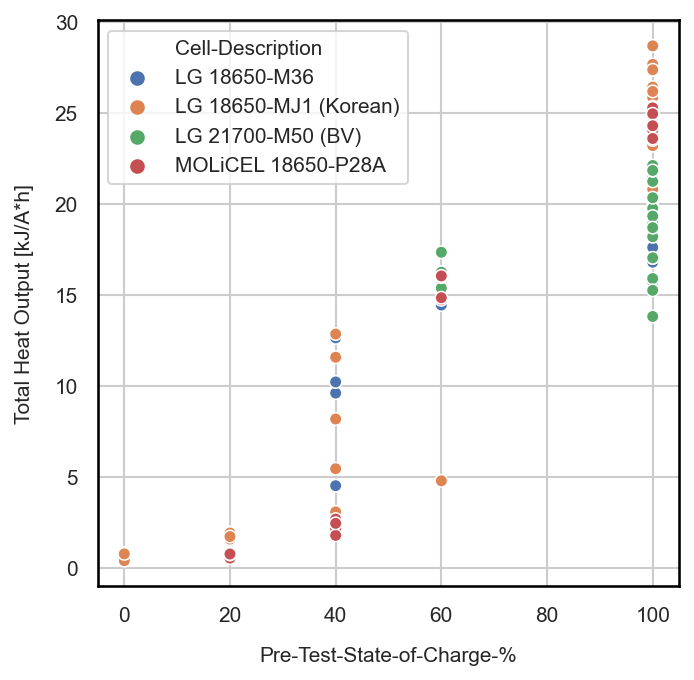

In [6]:
sns.set(rc={'figure.figsize': (5,5),'axes.labelsize': 10, 'ytick.labelsize': 10, 'axes.labelpad': 10,
            'legend.fontsize':10, 'xtick.labelsize': 10, "figure.dpi":150, 'legend.title_fontsize':5})
sns.set_style("whitegrid", {'axes.edgecolor':"black"})
sns.scatterplot(data=SOC, x='Pre-Test-State-of-Charge-%', y='Total Heat Output [kJ/A*h]', hue='Cell-Description')

# sns.lmplot(data=SOC, x='Pre-Test-State-of-Charge-%', y='Total Heat Output [kJ/A*h]', hue='Cell-Description')




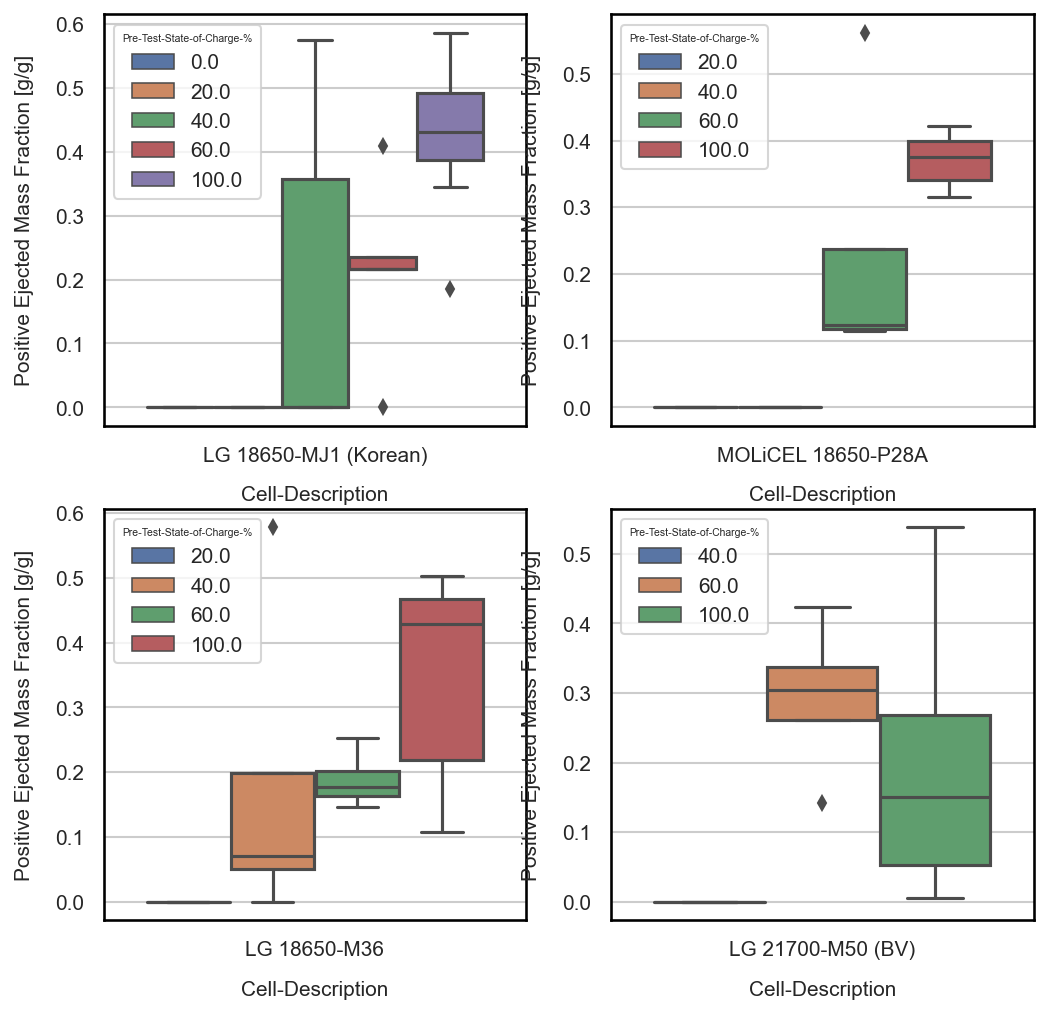

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(8,8))
axes = axes.ravel()

for i,cell in zip(range(4),cells):
    SOC = data.df.copy()
    SOC = SOC[SOC['Cell-Description']==cell]
    sns.boxplot(data=SOC, x='Cell-Description', y='Positive Ejected Mass Fraction [g/g]', hue='Pre-Test-State-of-Charge-%',ax=axes[i])
plt.savefig('pos_soc_mass.png',bbox_inches="tight")



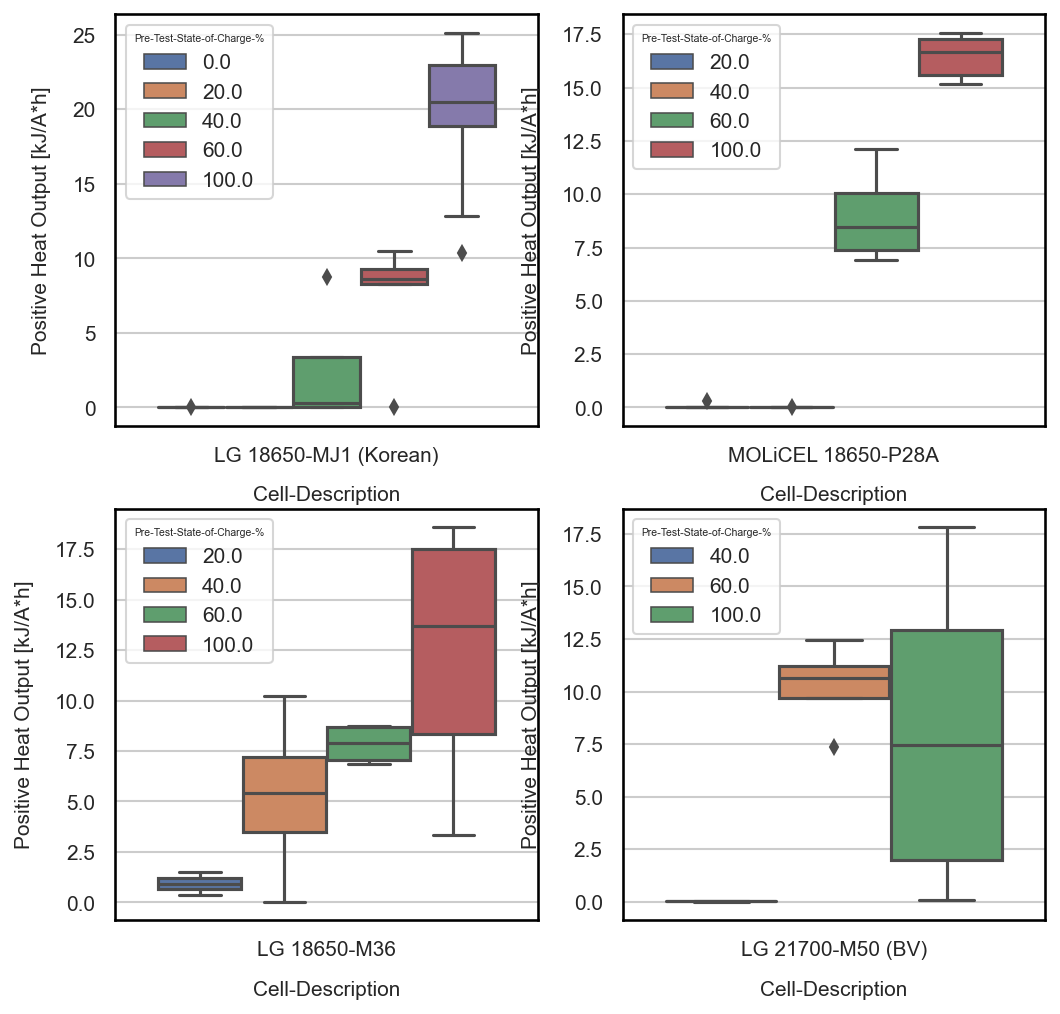

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(8,8))
axes = axes.ravel()

for i,cell in zip(range(4),cells):
    SOC = data.df.copy()
    SOC = SOC[SOC['Cell-Description']==cell]
    sns.boxplot(data=SOC, x='Cell-Description', y='Positive Heat Output [kJ/A*h]', hue='Pre-Test-State-of-Charge-%',ax=axes[i])

plt.savefig('pos_soc.png',bbox_inches="tight")

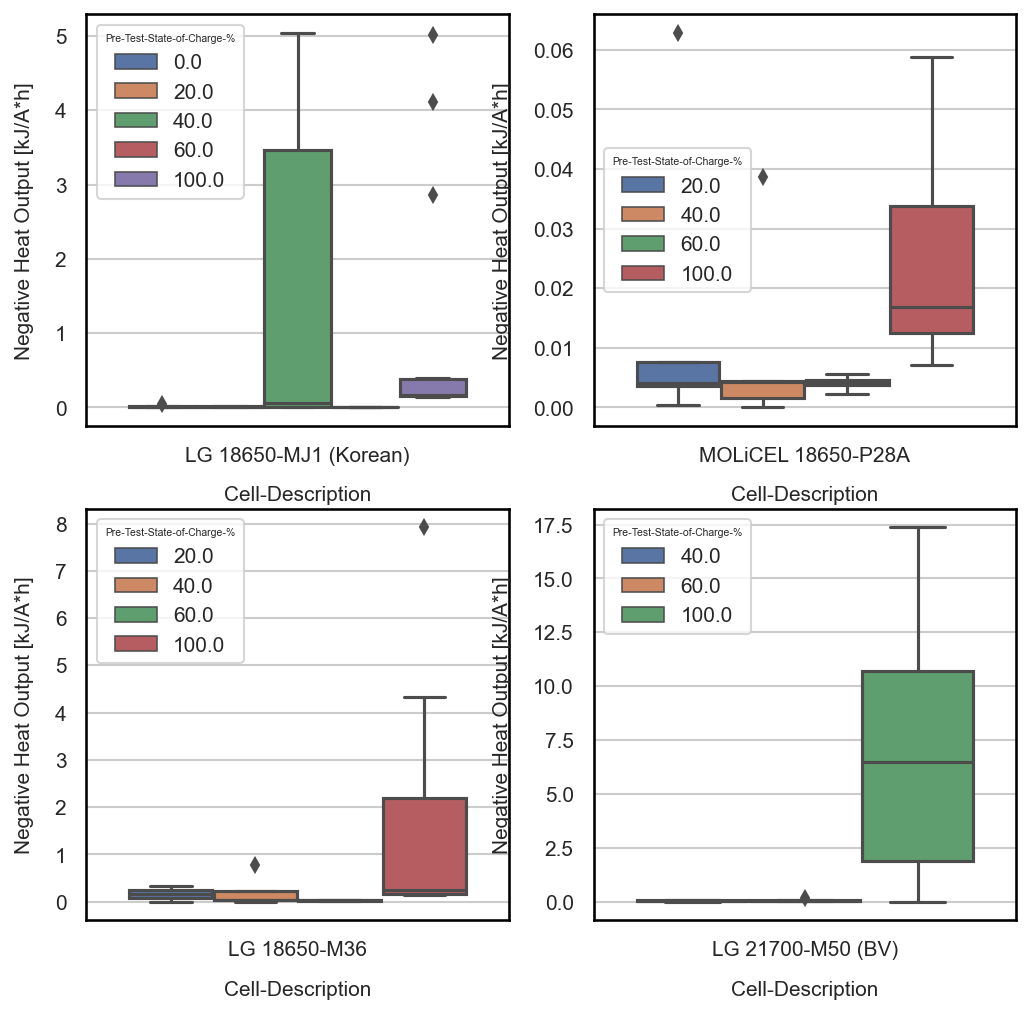

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(8,8))
axes = axes.ravel()

for i,cell in zip(range(4),cells):
    SOC = data.df.copy()
    SOC = SOC[SOC['Cell-Description']==cell]
    sns.boxplot(data=SOC, x='Cell-Description', y='Negative Heat Output [kJ/A*h]', hue='Pre-Test-State-of-Charge-%',ax=axes[i])

plt.savefig('neg_soc.png',bbox_inches="tight")

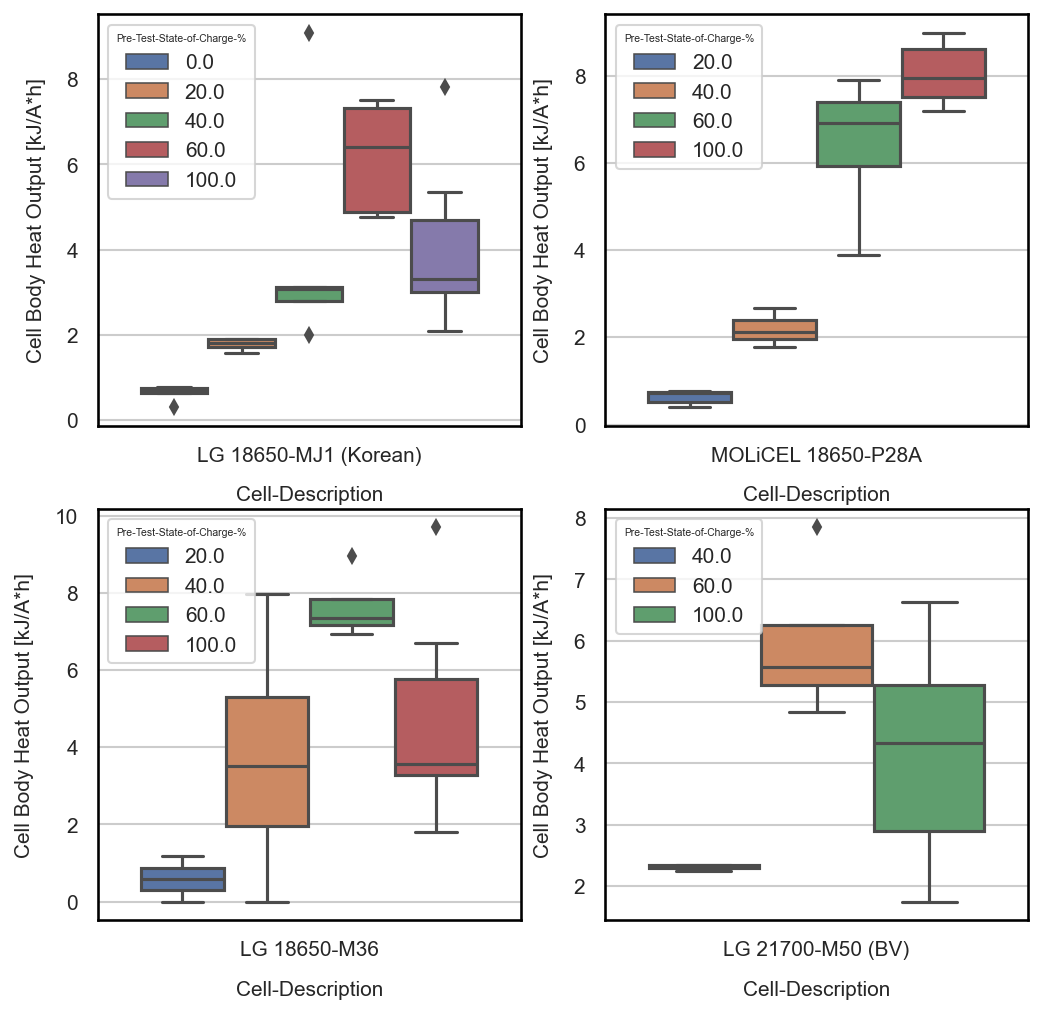

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(8,8))
axes = axes.ravel()

for i,cell in zip(range(4),cells):
    SOC = data.df.copy()
    SOC = SOC[SOC['Cell-Description']==cell]
    sns.boxplot(data=SOC, x='Cell-Description', y='Cell Body Heat Output [kJ/A*h]', hue='Pre-Test-State-of-Charge-%',ax=axes[i])

plt.savefig('bod_soc.png',bbox_inches="tight")

In [93]:
SOC.columns

Index(['Cell-Description', 'Test-ID', 'Test-Series', 'Trigger-Mechanism',
       'S-FTRC-Generation', 'Data-Processing-Utility', 'Test-Date',
       'Cell-ID-Number', 'Pre-Test-State-of-Charge-%',
       'Pre-Test-Cell-Open-Circuit-Voltage-V', 'Pre-Test-Cell-Mass-g',
       'Pre-Test-Positive-Copper-Mesh-Mass-g',
       'Pre-Test-Negative-Copper-Mesh-Mass-g',
       'Pressure-Assisted-Seal-Configuration-Positive',
       'Pressure-Assisted-Seal-Configuration-Negative',
       'Cell-Failure-Mechanism', 'Baseline-Total-Energy-Yield-kJ',
       'Conductive-Heat-Loss-Rate-kJs-1',
       'Baseline-Plus-Heat-Loss-Total-Energy-Yield-kJ',
       'Corrected-Total-Energy-Yield-kJ', 'Energy-Fraction-Cell-Body-kJ',
       'Energy-Fraction-Positive-Ejecta-kJ',
       'Energy-Fraction-Negative-Ejecta-kJ', 'Energy-Percent-Cell-Body-%',
       'Energy-Percent-Positive-Ejecta-%', 'Energy-Percent-Negative-Ejecta-%',
       'Theoretical-Energy-Positive-Unrecovered-Mass-kJ',
       'Theoretical-Energy-Neg